****

In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


**Q1. a) Perform PCA on SVHN data set. Find how many top eigenvectors are required to keep
the proportion of variance above 0.9. Plot PoV against number of eigenvectors.**

**Step 1: Reading the train dataset.  
Randomly sampling 2500 samples from each class to get total 25000 samples in the Train set**

In [2]:
mnist_train_data = scipy.io.loadmat('D:/SVHN_Dataset/train_32x32.mat')

In [3]:
def randomly_sample_2500_from_each_class(X, Y):
    X_train = []
    Y_train = []
    Y = Y.ravel()
    
    for class_label in range(1,11):
        class_indices = np.where(Y == class_label)[0]
        sampled_indices = np.random.choice(class_indices, 2500, replace=False)        
        # print(sampled_indices)
        X_train.append(X[:, :, :, sampled_indices])
        Y_train.append(Y[sampled_indices])
        
    X_train = np.concatenate(X_train, axis=-1)
    Y_train = np.concatenate(Y_train)
    return X_train, Y_train

In [4]:
X = mnist_train_data['X'].astype('double')  # Training data
Y = mnist_train_data['y']  # Training labels

X, Y = randomly_sample_2500_from_each_class(X, Y)

X = X.transpose(3, 0, 1, 2)
X = X.reshape(X.shape[0], -1)
X = X / 255
X_mean = np.mean(X, axis=0)
X -= X_mean 

print('X:', X.shape)
print('Y:', Y.shape)
print(f'X_mean: - {X_mean.shape}')

X: (25000, 3072)
Y: (25000,)
X_mean: - (3072,)


**Visualizing images from new training set containing one image from each class**

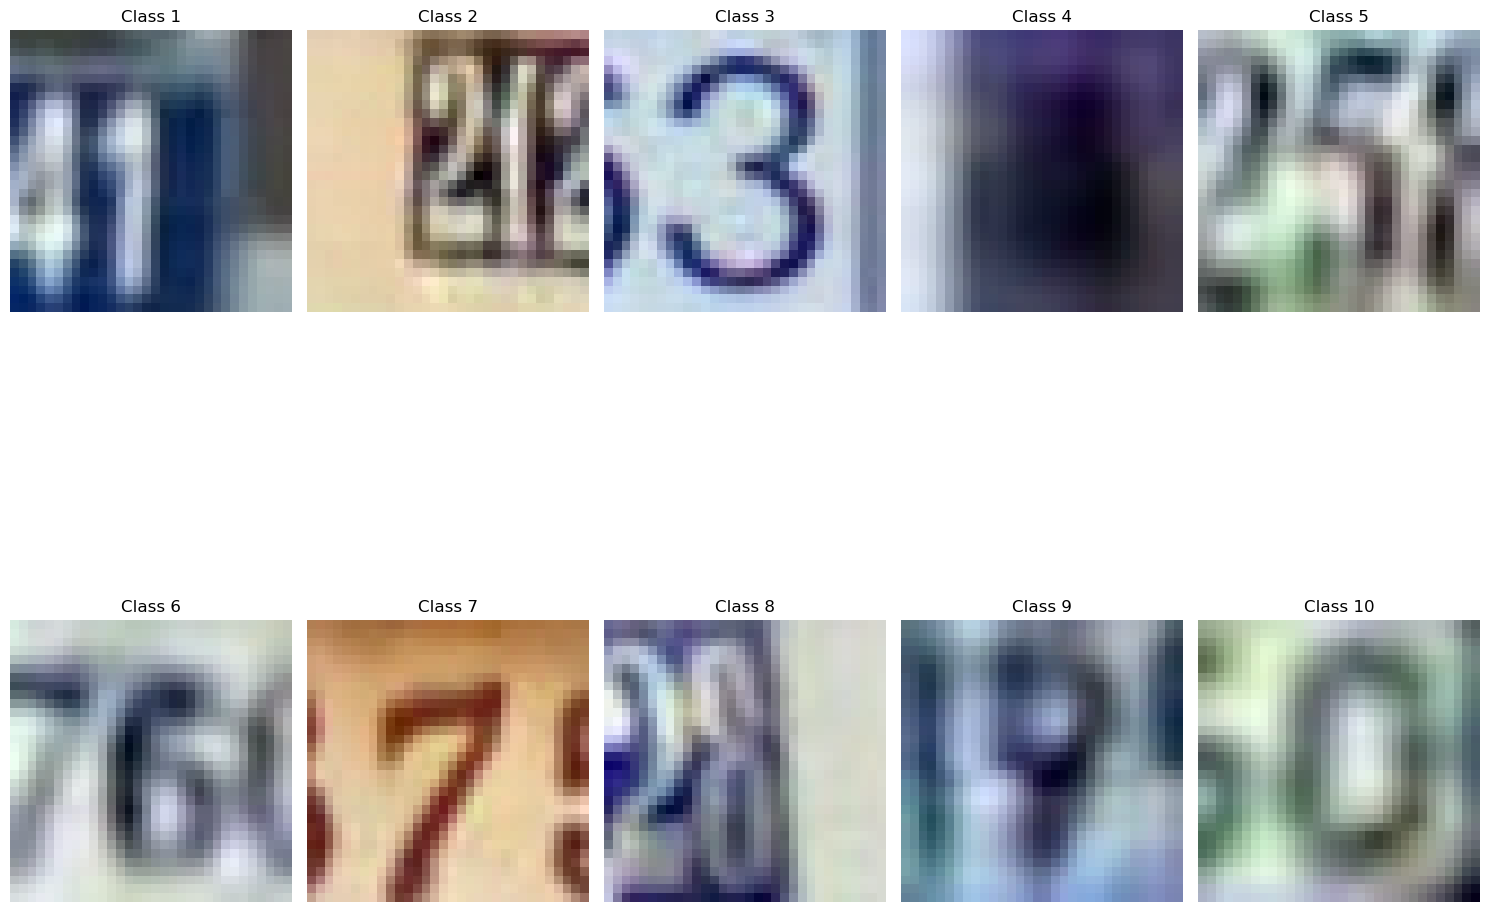

In [5]:
unique_labels = np.unique(Y)

# Sampling one image from each class
samples_for_reconstruction = []
for label in range(1, 11):
    index = np.where(Y == label)[0][0]  # Get the first sample for each class
    samples_for_reconstruction.append(X[index])

plt.figure(figsize=(15, 15))
for i in range(0, 10):
    plt.subplot(2, 5, i + 1)
    normalized_sample_for_reconstruction = (samples_for_reconstruction[i] - samples_for_reconstruction[i].min()) / (samples_for_reconstruction[i].max() - samples_for_reconstruction[i].min())
    plt.imshow(normalized_sample_for_reconstruction.reshape(32, 32, 3))
    plt.title(f'Class {unique_labels[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

**Step 2: Reading the test dataset**

In [6]:
mnist_test_data = scipy.io.loadmat('D:/SVHN_Dataset/test_32x32.mat')
X_test = mnist_test_data['X']
Y_test = mnist_test_data['y']

X_test = X_test.transpose(3, 0, 1, 2)
X_test = X_test.reshape(X_test.shape[0], -1)
X_test = X_test / 255

X_test -= X_mean 


print(f'X_test - {X_test.shape}')
print(f'Y_test - {Y_test.shape}')

X_test - (26032, 3072)
Y_test - (26032, 1)


**Step 3: Applying PCA: To identify top eigen vectors required to keep PoV > 0.9**

In [7]:
pca = PCA()
pca.fit(X)

PCA()

**Step 4: Calculate PoV for each eigenvector**

In [8]:
pov = np.cumsum(pca.explained_variance_ratio_)
pov

array([0.57697948, 0.63650174, 0.6879064 , ..., 0.99999998, 0.99999999,
       1.        ])

In [9]:
# Find the number of components required to keep PoV > 0.9
num_components = np.argmax(pov > 0.9) + 1
print('Number of top eigen vectors required to keep PoV > 0.9:', num_components)

Number of top eigen vectors required to keep PoV > 0.9: 27


**Step 5: Plotting POV graph for each PC**

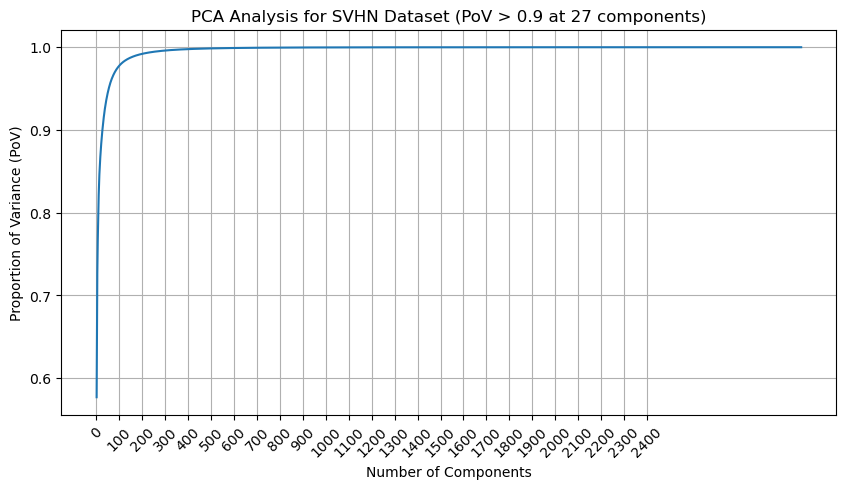

In [10]:
# Plot PoV vs. number of components
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(pov) + 1), pov)
plt.xlabel('Number of Components')
plt.ylabel('Proportion of Variance (PoV)')
plt.title(f'PCA Analysis for SVHN Dataset (PoV > 0.9 at {num_components} components)')
plt.xticks(np.arange(0,2500,100), rotation=45)
plt.grid()
plt.show()

**Q1. (b) Visualize top 10 eigenvectors and provide reconstruction of 10 SVHN samples (one
from each class) using top 10 eigenvectors**

**Step - 1: Perform PCA to get the top 10 eigenvectors**

In [11]:
pca_top_10 = PCA(n_components=10)
pca_top_10.fit(X)

PCA(n_components=10)

**Step - 2: Visualizing top 10 eigen vectors**

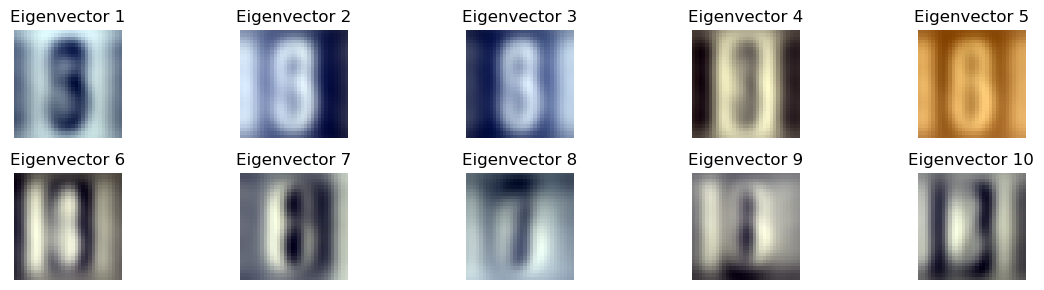

In [12]:
plt.figure(figsize=(12, 3))
eigenvectors = pca_top_10.components_
for i in range(10):
    plt.subplot(2, 5, i + 1)
    normalized_eigenvector = (eigenvectors[i] - eigenvectors[i].min()) / (eigenvectors[i].max() - eigenvectors[i].min())
    valid = normalized_eigenvector.reshape(32, 32, 3)
    plt.imshow(valid, cmap='viridis')
    plt.title(f'Eigenvector {i + 1}')
    plt.axis('off')

plt.tight_layout()
plt.show()

**Step- 3 : Re-construction of 10 SVHM samples, one from each class, using top 10 eigen vectors**

In [13]:
# Reconstruction of 10 SVHN samples
reconstructed_samples = pca_top_10.inverse_transform(pca_top_10.transform(samples_for_reconstruction))
len(reconstructed_samples)

10

**Re-constructed samples from top 10 eigen vectors**

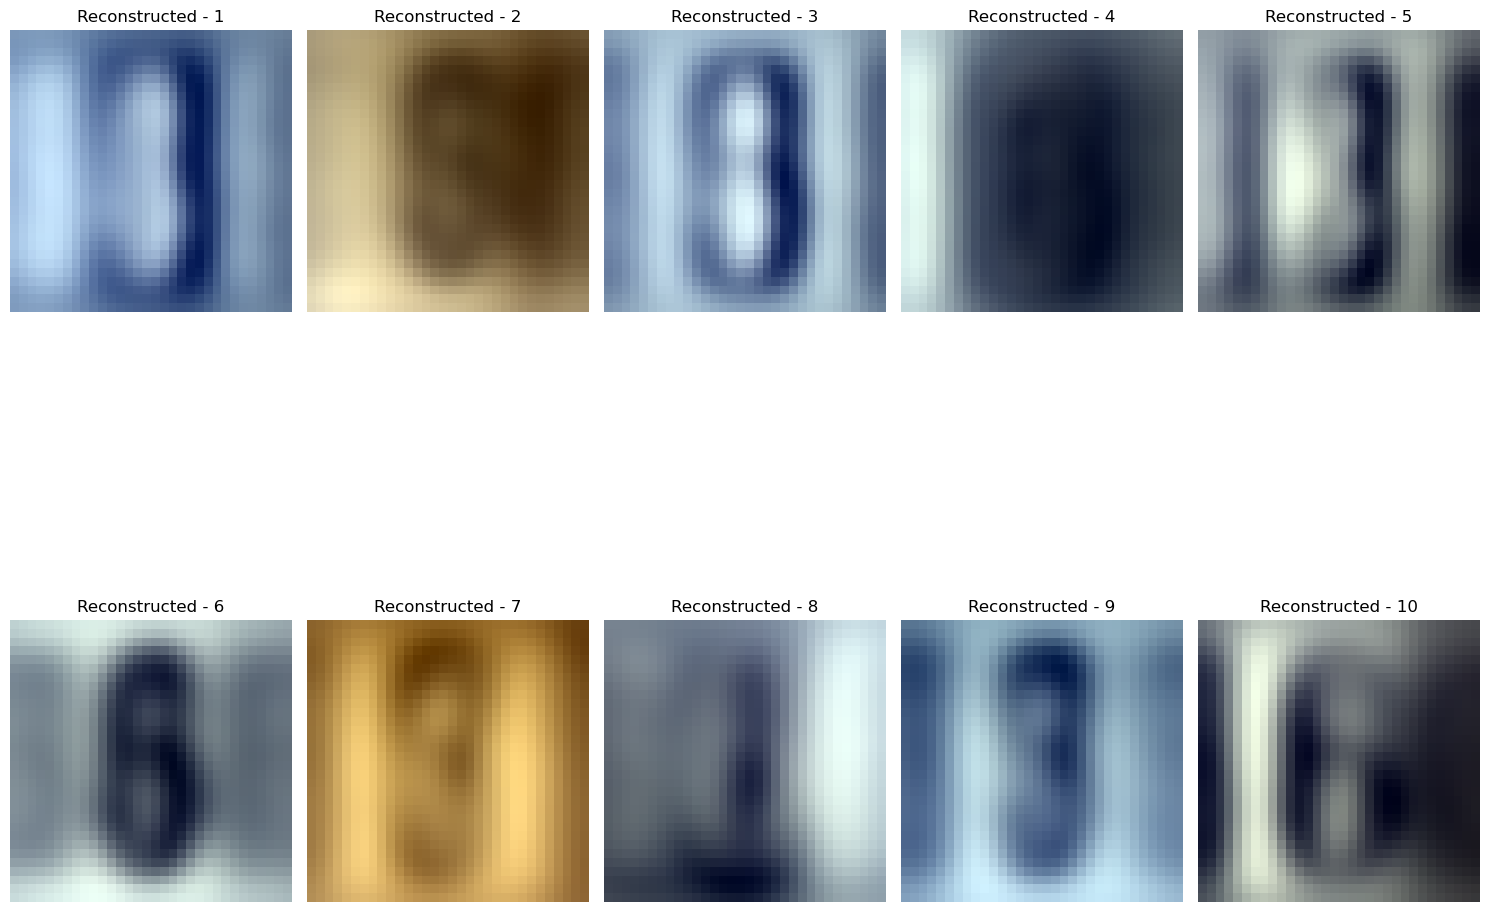

In [14]:
plt.figure(figsize=(15, 15))
for i in range(0, 10):
    plt.subplot(2, 5, 1 + i)
    normalized_reconstructed_sample = (reconstructed_samples[i] - reconstructed_samples[i].min()) / (reconstructed_samples[i].max() - reconstructed_samples[i].min())
    plt.imshow(normalized_reconstructed_sample.reshape(32, 32, 3), cmap='viridis')
    plt.title(f'Reconstructed - {i + 1}')
    plt.axis('off')
    
plt.tight_layout()
plt.show()

**Perform PCA to get the top 27 eigenvectors**

In [15]:
pca_top_27 = PCA(n_components=27)
pca_top_27.fit(X)

PCA(n_components=27)

**Visualizing top 27 eigen vectors**

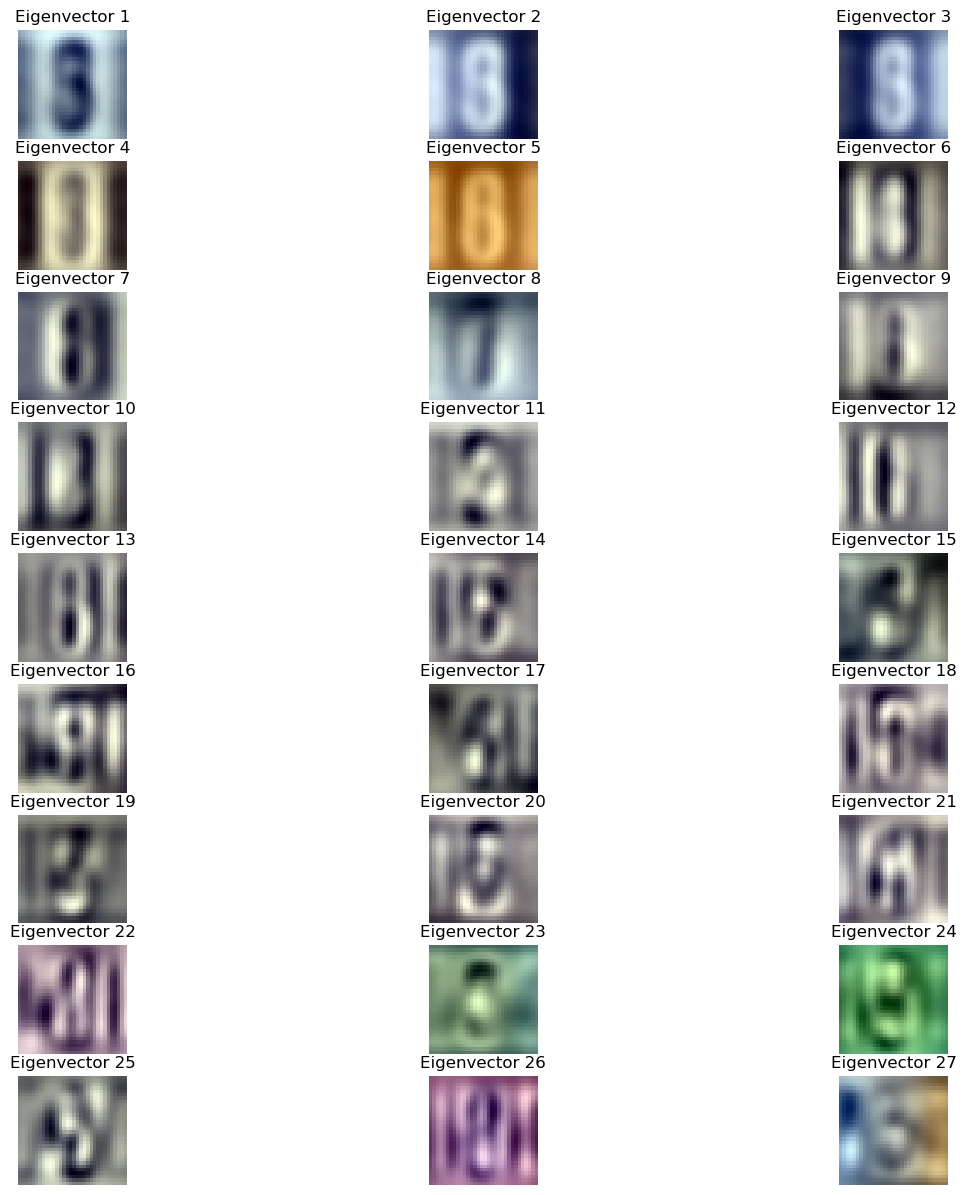

In [16]:
eigenvectors = pca_top_27.components_
plt.figure(figsize=(15, 15))
for i in range(0, 27):
    plt.subplot(9, 3, i + 1)
    normalized_eigenvector = (eigenvectors[i] - eigenvectors[i].min()) / (eigenvectors[i].max() - eigenvectors[i].min())
    plt.imshow(normalized_eigenvector.reshape(32, 32, 3), cmap='viridis')
    plt.title(f'Eigenvector {i + 1}')
    plt.axis('off')

**Re-construction of images from top 27 eigen vectors**

In [17]:
reconstructed_samples = pca_top_27.inverse_transform(pca_top_27.transform(samples_for_reconstruction))

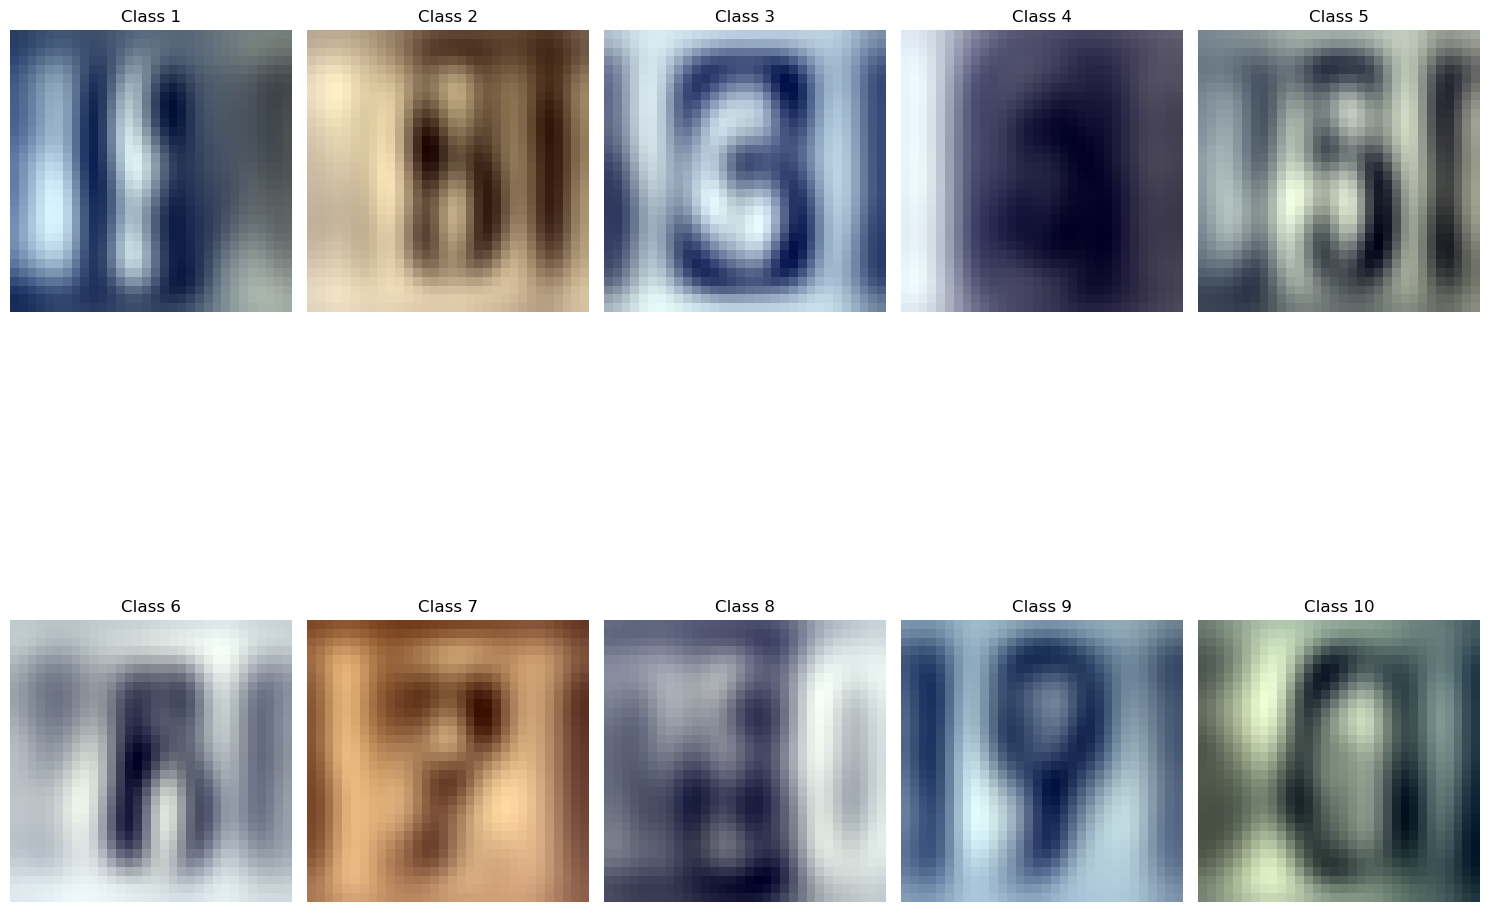

In [18]:
plt.figure(figsize=(15, 15))
for i in range(0, 10):
    plt.subplot(2, 5, 1 + i)
    reconstructed_sample = (reconstructed_samples[i] - reconstructed_samples[i].min()) / (reconstructed_samples[i].max() - reconstructed_samples[i].min())
    plt.imshow(reconstructed_sample.reshape(32, 32, 3))
    plt.title('Reconstructed')
    plt.title(f'Class {unique_labels[i]}')
    plt.axis('off')
    
plt.tight_layout()
plt.show()

**Q1 Part C - Run k-NN (for k=5 and k=7) on raw data and data obtained after PCA dimensionality
reduction for dimension as found in part (a) and for dimension 10 as in part (b). Provide
the accuracy of the predictions on the test data set for these various cases and discuss
your observations**

In [19]:
k_values = [5, 7]
dimensions_part_a = 27  # Using the dimensions obtained in part (a)
dimensions_part_b = 10  # Using dimensions 10 obtained in part (b)

**Applying K-NN on raw data**

In [20]:
for k in k_values:
    print(f"\nk-NN with k={k}:")

    # 1. k-NN on raw data
    knn_raw = KNeighborsClassifier(n_neighbors=k)
    knn_raw.fit(X, Y.ravel())
    y_pred_raw = knn_raw.predict(X_test)
    acc_raw = accuracy_score(Y_test.ravel(), y_pred_raw)
    print(f"Test-accuracy on raw data: {round(acc_raw*100, 2)} %")


k-NN with k=5:
Test-accuracy on raw data: 40.56 %

k-NN with k=7:
Test-accuracy on raw data: 41.96 %


**Applying K-NN on newly constructed data using top 27 eigen vectors (Part A)**

In [21]:
for k in k_values:
    print(f"\nk-NN with k={k}:")
    
     # 2. k-NN on PCA-transformed data (dimension from part a)
    pca_part_a = PCA(n_components=27)
    X_pca_part_a = pca_part_a.fit_transform(X)
    X_test_pca_part_a = pca_part_a.transform(X_test)
    
    knn_pca_part_a = KNeighborsClassifier(n_neighbors=k)
    knn_pca_part_a.fit(X_pca_part_a, Y.ravel())
    y_pred_pca_part_a = knn_pca_part_a.predict(X_test_pca_part_a)
    
    acc_pca_part_a = accuracy_score(Y_test.ravel(), y_pred_pca_part_a)
    print(f"Test accuracy on PCA transformed data part-a: {round(acc_pca_part_a*100, 2)} %")


k-NN with k=5:
Test accuracy on PCA transformed data part-a: 40.46 %

k-NN with k=7:
Test accuracy on PCA transformed data part-a: 41.22 %


**Applying K-NN on newly constructed data using top 10 eigen vectors (Part B)**

In [22]:
for k in k_values:
    print(f"\nk-NN with k={k}:")
    
     # 2. k-NN on PCA-transformed data (dimension from part a)
    pca_part_b = PCA(n_components=10)
    X_pca_part_b = pca_part_b.fit_transform(X)
    X_test_pca_part_b = pca_part_b.transform(X_test)
    
    knn_pca_part_b = KNeighborsClassifier(n_neighbors=k)
    knn_pca_part_b.fit(X_pca_part_b, Y.ravel())
    y_pred_pca_part_b = knn_pca_part_b.predict(X_test_pca_part_b)
    
    acc_pca_part_b = accuracy_score(Y_test.ravel(), y_pred_pca_part_b)
    print(f"Test accuracy on PCA transformed data part-b: {round(acc_pca_part_b*100, 2)} %")


k-NN with k=5:
Test accuracy on PCA transformed data part-b: 25.12 %

k-NN with k=7:
Test accuracy on PCA transformed data part-b: 26.04 %
